In [10]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

import nltk
import re 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from wordcloud import WordCloud

nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/kelvinfoo/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kelvinfoo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df = pd.read_csv('/Users/kelvinfoo/Desktop/AI Masters/TripAdvisor NLP/Data/tripadvisor_hotel_reviews.csv')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


### **Preprocess Text**

In [ ]:
# Include stopwords that might alter the text sentiment if excluded 
stop_words = set(stopwords.words('english')) - {"aren't", "but", "couldn't", "didn't", "doesn't", "few", "isn't", "no", "not", "under", "very", "wasn't", "weren't"}
stemmer = PorterStemmer()

In [9]:
def preprocess_text(text): 
    text = text.lower() # Casefolding 
    text = re.sub(r'[^a-z\s]', '', text) # Remove number, punctuation and special character 
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(tokens)

df['cleaned_reviews'] = df['Review'].apply(preprocess_text)
df.head()

,Review,Rating,cleaned_reviews
0,nice hotel expensive parking got good deal sta...,4,nice hotel expens park got good deal stay hote...
1,ok nothing special charge diamond member hilto...,2,ok noth special charg diamond member hilton de...
2,nice rooms not 4* experience hotel monaco seat...,3,nice room not experi hotel monaco seattl good ...
3,"unique, great stay, wonderful time hotel monac...",5,uniqu great stay wonder time hotel monaco loca...
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...


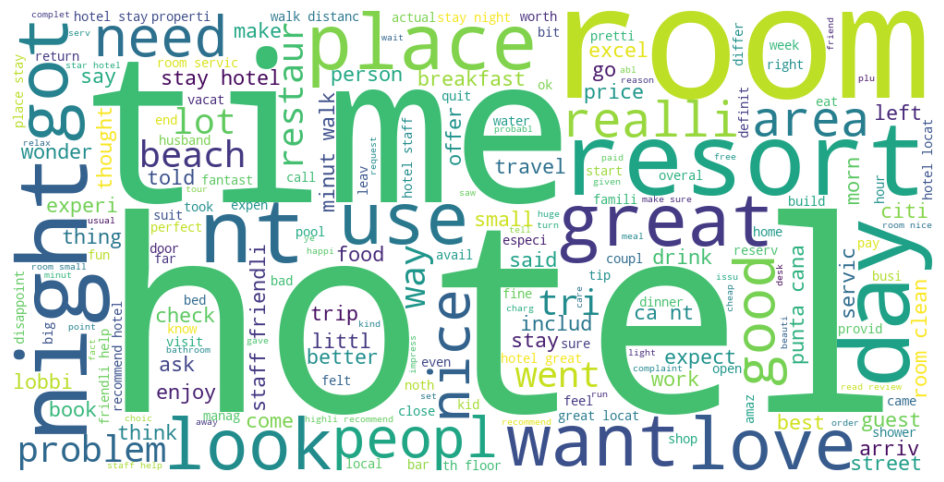

In [12]:
text = ''.join(df['cleaned_reviews'])
wordcloud = WordCloud(width = 1000, height = 500, background_color = 'white').generate(text)

plt.figure(figsize = (12, 6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [13]:
df.to_csv('/Users/kelvinfoo/Desktop/AI Masters/TripAdvisor NLP/Data/cleaned_reviews.csv')